In [98]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
import random
import numpy as np
import os
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanSquaredError

from sklearn.metrics import r2_score, mean_squared_error



In [99]:
# x_train = features, y_train = target

df = pd.read_csv('13-iri-cleaned.csv')



x = df.drop(['RoadRoidIRI'],axis=1)
y = df.RoadRoidIRI


# Seed value
# Apparently you may use different seed values at each stage
seed_value= 130

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
# import keras.backend.tensorflow_backend as K
# session_conf =  tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# K.set_session(sess)
# for later versions:
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# tf.compat.v1.keras.backend.set_session(sess)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=seed_value)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8889, random_state=seed_value)


In [100]:
def scale_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)
_ , x_val_scaled = scale_datasets(x_train, x_val)


In [101]:
hidden_units1 = 20

# hidden_units1 = 160
# hidden_units2 = 13
# hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    # Dropout(0.2),
    # Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    # Dropout(0.2),
    # Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='relu')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [102]:
# import tensorflow as tf
# from tensorflow.keras.metrics import Metric
# from tensorflow.keras import backend as K

# class R2KerasMetric(Metric):
#     def __init__(self, name='r2_keras', **kwargs):
#         super(R2KerasMetric, self).__init__(name=name, **kwargs)
#         self.r2_values = self.add_weight(name='r2_values', initializer='zeros')
#         self.total_samples = self.add_weight(name='total_samples', initializer='zeros')

#     def update_state(self, y_true, y_pred, sample_weight=None):
#         y_true_flat = tf.reshape(y_true, shape=(-1,))
#         y_pred_flat = tf.reshape(y_pred, shape=(-1,))
#         residual = y_true_flat - y_pred_flat
#         ss_res = K.sum(K.square(residual))
#         ss_tot = K.sum(K.square(y_true_flat - K.mean(y_true_flat)))
#         r2 = 1 - ss_res / (ss_tot + K.epsilon())
#         current_samples = tf.cast(tf.size(y_true), dtype=tf.float32)
#         self.r2_values.assign_add(r2 * current_samples)
#         self.total_samples.assign_add(current_samples)

#     def result(self):
#         return self.r2_values / self.total_samples

#     def reset_states(self):
#         self.r2_values.assign(0.0)
#         self.total_samples.assign(0.0)

#     # Add the variables property as required by Keras
#     @property
#     def variables(self):
#         return self._collected_trainable_weights

#     # Override the get_config method to avoid issues with serialization
#     def get_config(self):
#         return {}

In [103]:
# def r2_keras(y_true, y_pred):
#     r2 = r2_score(y_true, y_pred)
#     return tf.convert_to_tensor(r2, dtype=tf.float32)  # Convert the result to a tensor


# loss function
msle = MeanSquaredLogarithmicError()
mse = MeanSquaredError()
model.compile(
    loss=mse, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=['mse' ]
)


In [104]:
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=60, 
    batch_size=32,
    # validation_split=0.1,
    validation_data=(x_val_scaled.values, y_val.values)
)

Epoch 1/60


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 20.8115 - mse: 20.7862 - val_loss: 14.5195 - val_mse: 15.2114
Epoch 2/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.9873 - mse: 14.0198 - val_loss: 4.0609 - val_mse: 4.2158
Epoch 3/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3898 - mse: 4.4093 - val_loss: 3.2975 - val_mse: 3.4000
Epoch 4/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3862 - mse: 2.4015 - val_loss: 1.6593 - val_mse: 1.7152
Epoch 5/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7307 - mse: 1.7385 - val_loss: 1.2023 - val_mse: 1.2292
Epoch 6/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6279 - mse: 1.6373 - val_loss: 1.3461 - val_mse: 1.3899
Epoch 7/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5166 - mse: 1.5255 - val_loss: 1.2199 - val_mse: 1.2686
Epoch 8/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4647 - mse: 1.4732 - val_loss: 1.1403 - val_mse: 1.1894
Epoch 9/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4239 - mse: 1.43

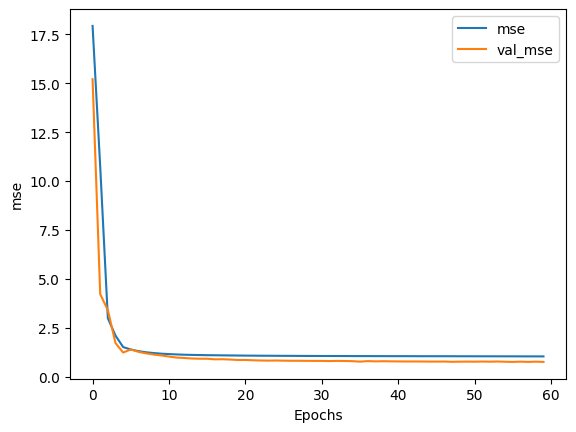

In [105]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mse')

In [106]:
x_test_prediction = model.predict(x_test_scaled.values)
x_train_prediction = model.predict(x_train_scaled.values)
x_val_prediction = model.predict(x_val_scaled.values)
model.evaluate(x_test_scaled.values,y_test.values)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6611 - mse: 0.6740 


[0.6298251152038574, 0.6492721438407898]

In [107]:
import numpy as np

test_mse = model.evaluate(x_test_scaled.values,y_test.values)[0]

test_r2 = 1 - test_mse / np.var(y)
train_r2 = 1 - (history.history['mse'][-1]) / np.var(y)
validation_r2 = 1 - (history.history['val_mse'][-1] / np.var(y))
print(f"test_r2 = {test_r2}")
print(f"train_r2 = {train_r2}")
print(f"validation_r2 = {validation_r2}")
# old
# test_r2 = 0.05136689008017359
# train_r2 = 0.6860328224469545
# validation_r2 = 0.2578106429040692

#Old 
# 2/2 [==============================] - 0s 5ms/step - loss: 4.1783 - mse: 4.1783
# test_r2 = 0.33610127898858966
# train_r2 = 0.5598734298560093
# validation_r2 = 0.4182105838540471

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6611 - mse: 0.6740 
test_r2 = 0.8232573005061976
train_r2 = 0.7101597643318722
validation_r2 = 0.7893417820367628


In [108]:
table_actual_predicted = x_test.copy(deep=True)
table_actual_predicted['y_predicted'] = model.predict(x_test_scaled)
table_actual_predicted['y_true'] = y_test
table_actual_predicted.to_csv("13_testing_output_ann.csv",index=False )

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


line: y = 0.7514941480421417 * x + 0.9205566405817338


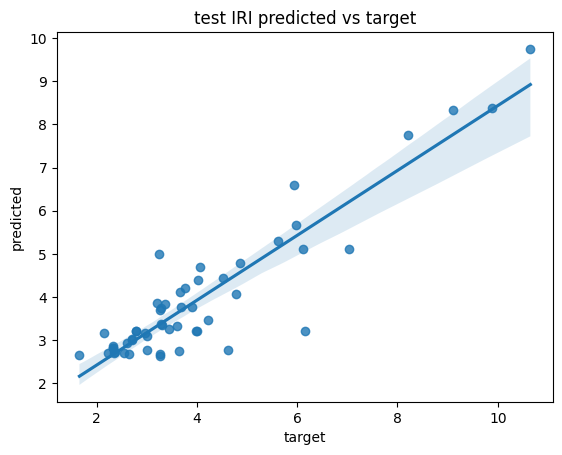

In [109]:
import seaborn as sns
ax = sns.regplot(x=y_test ,y= x_test_prediction,)
ax.set(title = 'test IRI predicted vs target', xlabel='target', ylabel='predicted')
#calculate slope and intercept of regression equation
import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")


line: y = 0.6797940257183192 * x + 1.230274592487178


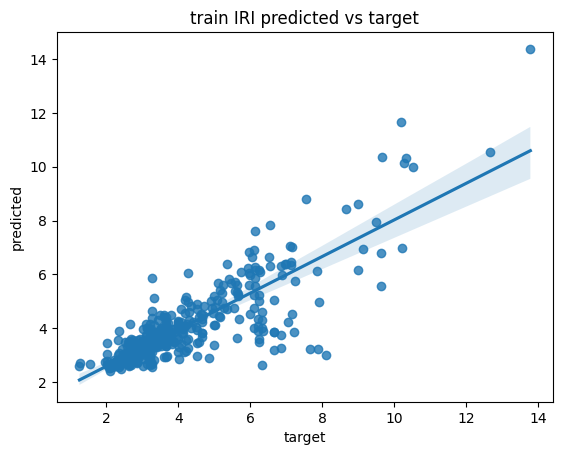

In [110]:
ax = sns.regplot(x=y_train, y= x_train_prediction)
ax.set(title = 'train IRI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")



line: y = 1.0531026291963979 * x + -0.06679576545652033


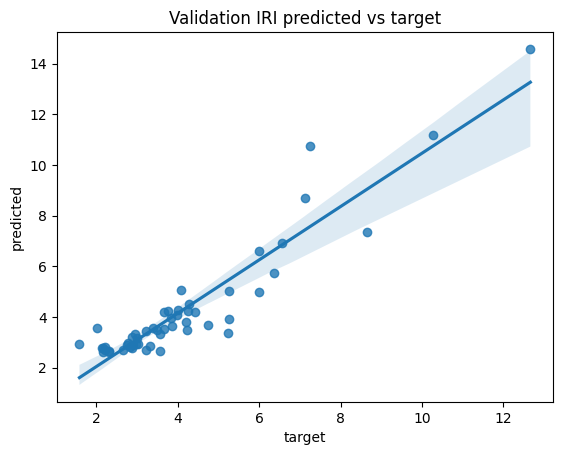

In [111]:
ax = sns.regplot(x=y_val, y = x_val_prediction)
ax.set(title = 'Validation IRI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

In [112]:
# z = pd.DataFrame({'AC1': [ 0.26],
#  'AC2': [ 1.2],
#  'AC3': [ 0.12],
#  'BE1': [ 0.151],
#  'BE2': [ 0.0],
#  'BE3': [ 0.0],
#  'D1': [ 0.0],
#  'D2': [ 0.0],
#  'D3': [ 0.0],
#  'F1': [ 0.0],
#  'F2': [ 0.0],
#  'F3': [ 0.0],
#  'G1': [ 0.0],
#  'G2': [ 0.0],
#  'G3': [ 0.0],
#  'H1': [ 0.0],
#  'H2': [ 0.0],
#  'H3': [ 0.0]})
# model.predict(pd.DataFrame(z))


z = pd.DataFrame(
{'ACLM' : [0.0],
'ACH' : [0.0],
'LTLM' : [0.0],
'LTH' : [0.0],
'PLM' : [0.0],
'PH' : [1],
'BH' : [0.0],
'PaLM' : [0.0],
'PaH' : [0.0],
'RuLM' : [0.0],
'RuH' : [0.0],
'DBL' : [0.0],
'DBH' : [0.0],
})

model.predict(z)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[4.460115]], dtype=float32)

In [114]:
# x_train = features, y_train = target
import pandas as pd

df = pd.read_csv('13-iri-cleaned.csv')



x = df.drop(['RoadRoidIRI'],axis=1)
y = df.RoadRoidIRI

import numpy as np
import os
import random
import tensorflow as tf

evaluation = []
histories = []
# Seed value
# Apparently you may use different seed values at each stage
for initial_seed in [130]:
    seed_value= initial_seed

    # 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
    os.environ['PYTHONHASHSEED']=str(seed_value)

    # 2. Set the `python` built-in pseudo-random generator at a fixed value
    random.seed(seed_value)

    # 3. Set the `numpy` pseudo-random generator at a fixed value
    np.random.seed(seed_value)

    # 4. Set the `tensorflow` pseudo-random generator at a fixed value
    tf.random.set_seed(seed_value)
    # for later versions: 
    # tf.compat.v1.set_random_seed(seed_value)

    # 5. Configure a new global `tensorflow` session
    # import keras.backend.tensorflow_backend as K
    # session_conf =  tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    # sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    # K.set_session(sess)
    # for later versions:
    # session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    # sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    # tf.compat.v1.keras.backend.set_session(sess)


    # from keras import backend as K
    # K.tensorflow_backend.set_session(sess)
    # import tensorflow.keras.backend as K
    # K.set_session(sess)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=seed_value)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8889, random_state=seed_value)


    x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)
    _ , x_val_scaled = scale_datasets(x_train, x_val)


    # model = build_model_using_sequential()
    for hu in [20]:
        model = Sequential([
            Dense(hu, kernel_initializer='normal', activation='relu'),
            # Dropout(0.2),
            # Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
            # Dropout(0.2),
            # Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
            Dense(1, kernel_initializer='normal', activation='relu')
        ])

        # loss function
        msle = MeanSquaredLogarithmicError()
        mse = MeanSquaredError()
        
        model.compile(
        loss=mse, 
        optimizer=Adam(learning_rate=learning_rate), 
        metrics=['mse' ]
    )
        # train the model
        history = model.fit(
            x_train_scaled.values, 
            y_train.values, 
            epochs=60, 
            batch_size=32,
            # validation_split=0.1,
            validation_data=(x_val_scaled.values, y_val.values),
            # verbose=0
        )

        # plot_history(history, 'mse')
        histories.append(history)


        test_mse = model.evaluate(x_test_scaled.values,y_test.values)[0]

        test_r2 = 1 - test_mse / np.var(y)
        train_r2 = 1 - (history.history['mse'][-1]) / np.var(y)
        validation_r2 = 1 - (history.history['val_mse'][-1] / np.var(y))

        # r2_df.loc[(initial_seed, hu), :] = [train_r2, validation_r2, test_r2]
        evaluation.append([hu, test_r2, train_r2, validation_r2])
        
        print(f"test_r2 = {test_r2}")
        print(f"train_r2 = {train_r2}")
        print(f"validation_r2 = {validation_r2}")
# r2_df.to_csv("eval3.csv")




Epoch 1/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 20.8115 - mse: 20.7862 - val_loss: 14.5195 - val_mse: 15.2114
Epoch 2/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.9873 - mse: 14.0198 - val_loss: 4.0609 - val_mse: 4.2158
Epoch 3/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3898 - mse: 4.4093 - val_loss: 3.2975 - val_mse: 3.4000
Epoch 4/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3862 - mse: 2.4015 - val_loss: 1.6593 - val_mse: 1.7152
Epoch 5/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7307 - mse: 1.7385 - val_loss: 1.2023 - val_mse: 1.2292
Epoch 6/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6279 - mse: 1.6373 - val_loss: 1.3461 - val_mse: 1.3899
Epoch 7/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5166 - mse: 1.5255 - val_loss: 1.2199 - val_mse: 1.2686
Epoch 8/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4647 - mse: 1.4732 - val_loss: 1.1403 - val_mse: 1.1894
Epoch 9/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4239 